<a href="https://colab.research.google.com/github/RaiGon84/Pytorch-Tutorial/blob/main/CNN_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Convert MNIST image files into a 4-D Tensor
transform = transforms.ToTensor()

In [ ]:
# Train Data
train_data = datasets.MNIST(root='/cnn_data',train=True,download=True, transform=transform)

In [ ]:
# Test Data
test_data = datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform)

In [ ]:
# Create small batch for images
train_loader = DataLoader(train_data, batch_size=10,shuffle=10)
test_loader = DataLoader(test_data, batch_size=10,shuffle=False)


In [ ]:
# Define our CNN Model
# Describe convolutional layers
conv1 = nn.Conv2d(1, 6, 3,  1)
conv2 = nn.Conv2d(6, 16, 3,  1)

In [ ]:
# Grab 1 MNIST image
for i, (X_train,y_train) in enumerate(train_data):
  break

In [ ]:
x = X_train.view(1,1,28,28)

In [ ]:
# Perform first convolution
x = F.relu(conv1(x))

In [ ]:
# 1 # of images, 6 # of filters
x.shape

torch.Size([1, 6, 26, 26])

In [ ]:
# Pass through pooling layer
x = F.max_pool2d(x,2,2) # kernel of 2 and stride of 2

In [ ]:
x.shape # 26 / 2 = 13

torch.Size([1, 6, 13, 13])

In [ ]:
# Do 2nd convolutional layer
x = F.relu(conv2(x))

In [ ]:
x.shape

torch.Size([1, 16, 11, 11])

In [ ]:
# Do 2nd pooling layer
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([1, 16, 5, 5])

In [ ]:
# Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Full connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  # Forward function
  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    # Re-view to flatten
    X = X.view(-1,16*5*5) # It is negative so we can vary batch size

    # Fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)

In [ ]:
# Create model instance
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
import time
start_time = time.time()

# Create variables
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loops of epochs
for i in range(epochs):
  train_corr = 0
  test_corr = 0

  # Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b+= 1
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)

    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()
    train_corr += batch_corr

    # Update paramters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print results
    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(train_corr)

  # Test
  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
      test_corr += (predicted == y_test).sum()

  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(test_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training took: {total/60} minutes')

Epoch: 0 Batch: 600 Loss: 0.16236107051372528
Epoch: 0 Batch: 1200 Loss: 0.15510495007038116
Epoch: 0 Batch: 1800 Loss: 0.4651116728782654
Epoch: 0 Batch: 2400 Loss: 0.17726822197437286
Epoch: 0 Batch: 3000 Loss: 0.007429888937622309
Epoch: 0 Batch: 3600 Loss: 0.37731707096099854
Epoch: 0 Batch: 4200 Loss: 0.004938055761158466
Epoch: 0 Batch: 4800 Loss: 0.0015040982980281115
Epoch: 0 Batch: 5400 Loss: 0.06845302879810333
Epoch: 0 Batch: 6000 Loss: 0.0004587689763866365
Epoch: 1 Batch: 600 Loss: 0.002925408538430929
Epoch: 1 Batch: 1200 Loss: 0.2792360186576843
Epoch: 1 Batch: 1800 Loss: 0.0018853390356525779
Epoch: 1 Batch: 2400 Loss: 0.0030733426101505756
Epoch: 1 Batch: 3000 Loss: 0.024190708994865417
Epoch: 1 Batch: 3600 Loss: 0.5062173008918762
Epoch: 1 Batch: 4200 Loss: 0.02014169655740261
Epoch: 1 Batch: 4800 Loss: 0.001421573688276112
Epoch: 1 Batch: 5400 Loss: 0.0006034405087120831
Epoch: 1 Batch: 6000 Loss: 0.1528162956237793
Epoch: 2 Batch: 600 Loss: 0.07298740744590759
Epoch

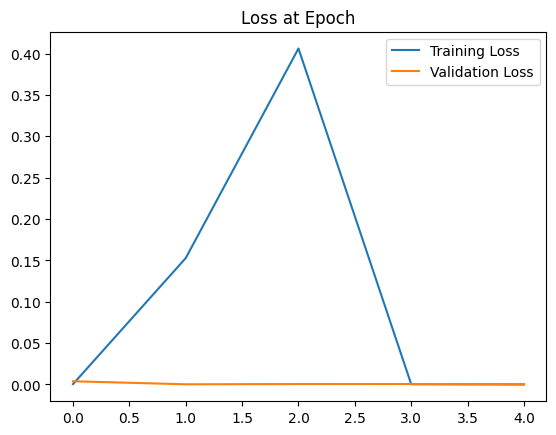

In [ ]:

plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Validation Loss')
plt.title('Loss at Epoch')
plt.legend()

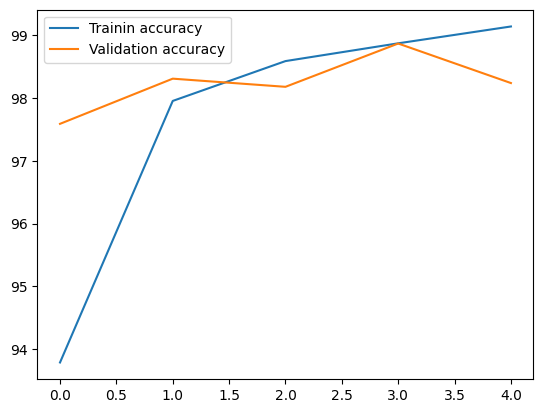

In [ ]:
# Graph accuracy
plt.plot([t/600 for t in train_correct],label='Trainin accuracy')
plt.plot([t/100 for t in test_correct],label='Validation accuracy')
plt.legend()

In [ ]:
test_load_everything = DataLoader(test_data,batch_size=10000,shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val.data,1)[1]
    correct += (predicted == y_test).sum()

In [ ]:
# Test for correctness
correct.item()/len(test_data)

0.9824

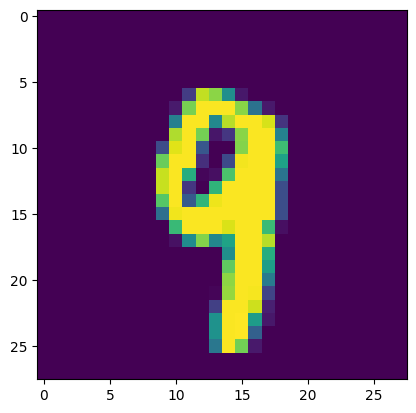

In [ ]:
# Grab an image
test_data[4143][0].reshape(28,28)
plt.imshow(test_data[4143][0].reshape(28,28))

In [ ]:
# Image through model
model.eval()
with torch.no_grad():
   new_prediction = model(test_data[4143][0].view(1,1,28,28))

In [ ]:
# Check new image
new_prediction.argmax()

tensor(9)